In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
titanic=pd.read_csv('titanic1.csv')

In [3]:
titanic.head()

,CLASS,AGE,SEX,SURVIVE
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [4]:
titanic.shape

(2201, 4)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   CLASS    2201 non-null   int64
 1   AGE      2201 non-null   int64
 2   SEX      2201 non-null   int64
 3   SURVIVE  2201 non-null   int64
dtypes: int64(4)
memory usage: 68.9 KB


In [6]:
titanic.isnull().sum()

CLASS      0
AGE        0
SEX        0
SURVIVE    0
dtype: int64

Text(0.5, 1, 'correlation matrix')

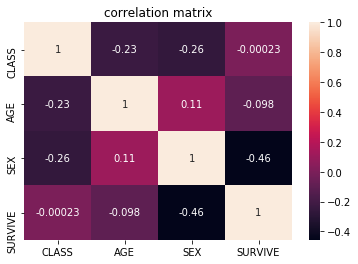

In [7]:
sb.heatmap(titanic.corr(),annot=True)
plt.title('correlation matrix')

Text(0.5, 1, 'covariance matrix')

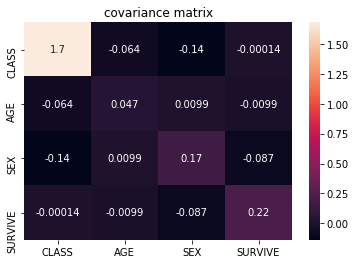

In [8]:
sb.heatmap(titanic.cov(),annot=True)
plt.title('covariance matrix')

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler   
X_std=StandardScaler().fit_transform(titanic)

In [10]:
X_std

array([[-0.28475544,  0.22826136,  0.52107519,  1.44763253],
       [-0.28475544,  0.22826136,  0.52107519,  1.44763253],
       [-0.28475544,  0.22826136,  0.52107519,  1.44763253],
       ...,
       [-1.05661101,  0.22826136, -1.91910884, -0.69078304],
       [-1.05661101,  0.22826136, -1.91910884, -0.69078304],
       [-1.05661101,  0.22826136, -1.91910884, -0.69078304]])

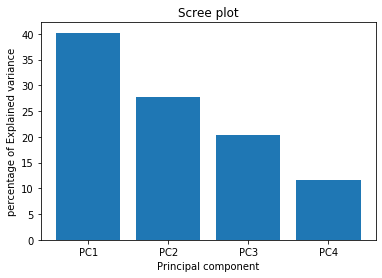

In [11]:
pca=PCA()
sklearn_pca_x=pca.fit(X_std)
sklearn_pca_x=pca.transform(X_std)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels=['PC'+ str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('percentage of Explained variance')
plt.xlabel('Principal component')
plt.title('Scree plot')
plt.show()

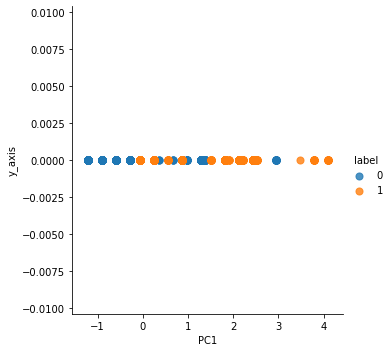

In [12]:
SURVIVE=titanic[['SURVIVE']]
pca=PCA(n_components=1)
sklearn_pca_x=pca.fit_transform(X_std)

import matplotlib.pyplot as plt
import seaborn as sns
sklearn_result=pd.DataFrame(sklearn_pca_x,columns=['PC1'])
sklearn_result['y_axis']=0.0
sklearn_result['label']=SURVIVE
sns.lmplot('PC1','y_axis',data=sklearn_result,fit_reg=False,scatter_kws={"s":50},hue="label")
#sns.lmplot('PC1','Region class',data=sklearn_result,fit_reg=False,scatter_kws={"s":50},hue="label")

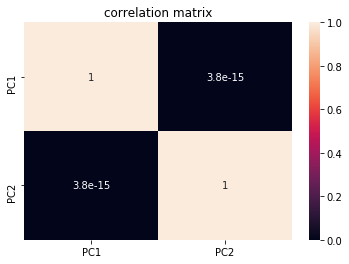

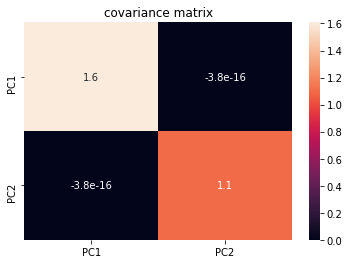

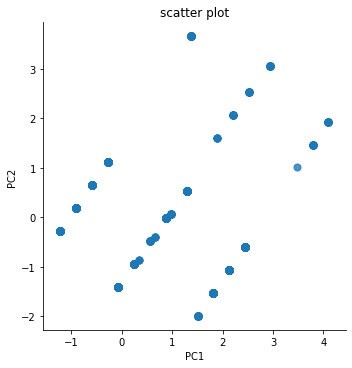

In [13]:
pca=PCA(n_components=2)
sklearn_pca_x=pca.fit_transform(X_std)
import matplotlib.pyplot as plt
import seaborn as sns
sklearn_result=pd.DataFrame(sklearn_pca_x,columns=['PC1','PC2'])

sb.heatmap(sklearn_result.corr(),annot=True)
plt.title('correlation matrix')
plt.show()

sb.heatmap(sklearn_result.cov(),annot=True)
plt.title('covariance matrix')

sns.lmplot('PC1','PC2',data=sklearn_result,fit_reg=False,scatter_kws={"s":50})
plt.title('scatter plot')
plt.show()

In [14]:
pca = PCA(n_components=3)
sklearn_pca_x=pca.fit_transform(X_std)
sklearn_result = pd.DataFrame(data = sklearn_pca_x
             , columns = ['PC1','PC2','PC3'])

In [15]:
x1 = sklearn_result['PC1']
x2 = sklearn_result['PC2']
x3 = sklearn_result['PC3']

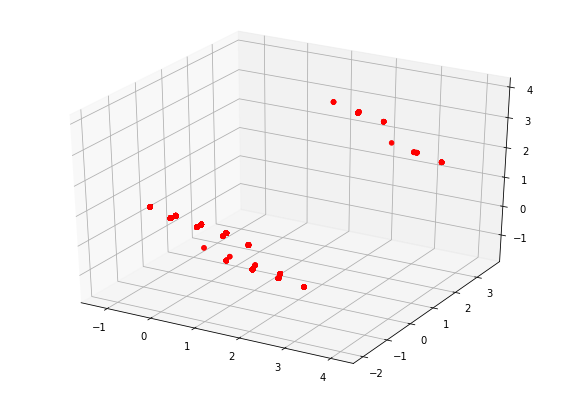

In [16]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
  

ax.scatter3D(x1, x2, x3, color = "red"); 
plt.show()